# 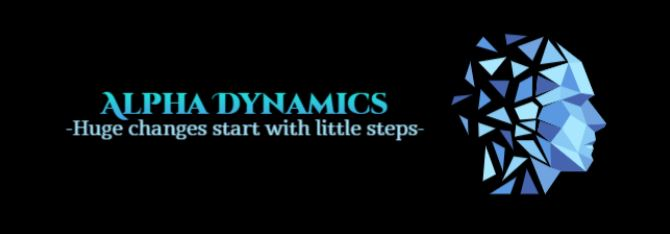
# WORLD VALUES SURVEY (Initial preprossesing on this data) 19/09/2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
wvs = pd.read_csv("data_wvs6.csv")

In [4]:
wvs.shape

(89565, 441)

This survey was taken within 2010-2014 in order to identify the situation in different spheres of peoples' lives. As we know this data obtains 441 variables with 89565 observations each. This is a big and multidirectional observation which helps researchers to make significant explores in various countries' communities. In this issue Azerbaijan is taken as the target country and the analyses are made based on this country. From 441 variables, several are choosen for analysis. First of all, let's observe all variables in this data

In [5]:
wvs.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V2A', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       ...
       'VOICE', 'WEIGHT4B', 'S001', 'S007', 'S018', 'S019', 'S021', 'S024',
       'S025', 'COW'],
      dtype='object', length=441)

From above code line we face with 2 problems:
1. The number of columns is too much. For analysis we must choose several of them
2. The names of columns aren't understandable. To introduce with these variables we should read the codebook and official questionnaire of WVS in the following website (http://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp)

In [6]:
# Let's specify the data for Azerbaijan
# Azerbaijan country code in this survey is 31
data_az = wvs[wvs.V2 == 31]

In [7]:
data_az.head()

,Unnamed: 0,V1,V2,V2A,V3,V4,V5,V6,V7,V8,...,VOICE,WEIGHT4B,S001,S007,S018,S019,S021,S024,S025,COW
4807,4808,6,31,31,1,1,2,2,2,1,...,0.165,1.0,2,24897,1.671733,2.507600,NaN,316,312011,373
4808,4809,6,31,31,2,2,1,2,2,1,...,0.250,1.0,2,24898,0.387243,0.580865,NaN,316,312011,373
4809,4810,6,31,31,3,1,2,3,4,1,...,0.250,1.0,2,24899,1.671733,2.507600,NaN,316,312011,373
4810,4811,6,31,31,4,1,2,4,4,2,...,0.665,1.0,2,24900,1.671733,2.507600,NaN,316,312011,373
4811,4812,6,31,31,5,1,2,2,4,1,...,0.165,1.0,2,24901,1.671733,2.507600,NaN,316,312011,373


As the target or output values we will take "V10" which answers the following question:
V10 Taking all things together, would you say you are (read out and code one answer):
    1 Very happy
    2 Rather happy
    3 Not very happy
    4 Not at all happy

And the answers from the codebook has following categories:
V10 Feeling of happiness
    1.- Very happy
    2.- Rather happy
    3.- Not very happy
    4.- Not at all happy
    -5-.- HT: Missing-Dropped out survey; RU: Inappropriate response
    -4-.- Not asked in survey
    -3-.- Not applicable
    -2-.- No answer
    -1-.- Don´t know

As input variables there are V57, V58, V59, V84, V141, V142, V238, V239, V248. These variable answer to these following questions:
V57. Are you currently (read out and code one answer only):
1 Married
2 Living together as married
3 Divorced
4 Separated
5 Widowed
6 Single

V58. Have you had any children? (Code 0 if no, and respective number if yes):
0 No children
1 One child
2 Two children
3 Three children
4 Four children
5 Five children
6 Six children
7 Seven children
8 Eight or more children

V59. How satisfied are you with the financial situation of your household? Please use this card again to
help with your answer (code one number):
Completely dissatisfied(0), Completely satisfied(10)
1 2 3 4 5 6 7 8 9 10

V84. How interested would you say you are in politics? Are you (read out and code one answer):
1 Very interested
2 Somewhat interested
3 Not very interested
4 Not at all interested

V141. And how democratically is this country being governed today? Again using a scale from 1 to 10,
where 1 means that it is “not at all democratic” and 10 means that it is “completely democratic,”
what position would you choose? (Code one number):
Not at all democratic(0) Completely democratic(10)
1 2 3 4 5 6 7 8 9 10

V142. How much respect is there for individual human rights nowadays in this country? Do you feel there
is (read out and code one answer):
1 A great deal of respect for individual human rights
2 Fairly much respect
3 Not much respect
4 No respect at all

V238. People sometimes describe themselves as belonging to the working class, the middle class, or the
upper or lower class. Would you describe yourself as belonging to the (read out and code one
answer):
1 Upper class
2 Upper middle class
3 Lower middle class
4 Working class
5 Lower class

V239. On this card is an income scale on which 1 indicates the lowest income group and 10 the highest
income group in your country. We would like to know in what group your household is. Please,
specify the appropriate number, counting all wages, salaries, pensions and other incomes that come
in. (Code one number):
Lowest group(1) Highest group(10)
1 2 3 4 5 6 7 8 9 10

V240. (Code respondent’s sex by observation):
1 Male
2 Female

V248. What is the highest educational level that you have attained? [NOTE: if respondent indicates to be a
student, code highest level s/he expects to complete]:
1 No formal education
2 Incomplete primary school
3 Complete primary school
4 Incomplete secondary school: technical/vocational type
5 Complete secondary school: technical/vocational type
6 Incomplete secondary: university-preparatory type
7 Complete secondary: university-preparatory type
8 Some university-level education, without degree
9 University-level education, with degree

In [8]:
data_aze = data_az.loc[:,["V57", "V58", "V59", "V84", "V141", "V142", "V238", "V239", "V240", "V248", "V10"]]

In [9]:
data_aze.columns = ["Marriage", "Child", "Finance", "Politics", "Democracy", "H_rights", "Casta", "Income_gr", "Gender", "Edu_level", "Happiness"]

In [10]:
data_aze.shape

(1002, 11)

In [11]:
data_aze.head()

,Marriage,Child,Finance,Politics,Democracy,H_rights,Casta,Income_gr,Gender,Edu_level,Happiness
4807,1,3,5,1,2,3,2,6,1,7.0,2
4808,6,0,5,2,3,3,2,6,1,9.0,2
4809,1,3,7,4,3,3,2,6,2,7.0,2
4810,1,3,5,4,3,2,3,6,2,7.0,2
4811,6,0,7,4,4,3,2,6,2,7.0,1


In [12]:
data_aze.isnull().sum()

Marriage     0
Child        0
Finance      0
Politics     0
Democracy    0
H_rights     0
Casta        0
Income_gr    0
Gender       0
Edu_level    0
Happiness    0
dtype: int64

The output variable "Happiness" demonstrates to what extent an individual is happy. It was coded by these four answer levels: 1 Very happy 2 Rather happy 3 Not very happy 4 Not at all happy. As our output value is not binary we should change it for the originals values for future encoding.

In [13]:
data_aze.Happiness.replace([1, 2, 3, 4], ["Very happy", "Rather happy", "Not very happy", "Not at all happy"], inplace=True)

In [14]:
data_aze.Happiness.value_counts()

Rather happy        556
Very happy          264
Not very happy      158
Not at all happy     24
Name: Happiness, dtype: int64

In [15]:
data_aze.head()

,Marriage,Child,Finance,Politics,Democracy,H_rights,Casta,Income_gr,Gender,Edu_level,Happiness
4807,1,3,5,1,2,3,2,6,1,7.0,Rather happy
4808,6,0,5,2,3,3,2,6,1,9.0,Rather happy
4809,1,3,7,4,3,3,2,6,2,7.0,Rather happy
4810,1,3,5,4,3,2,3,6,2,7.0,Rather happy
4811,6,0,7,4,4,3,2,6,2,7.0,Very happy


To understand the data let's make a bit plotting with matplotlib and seaborn

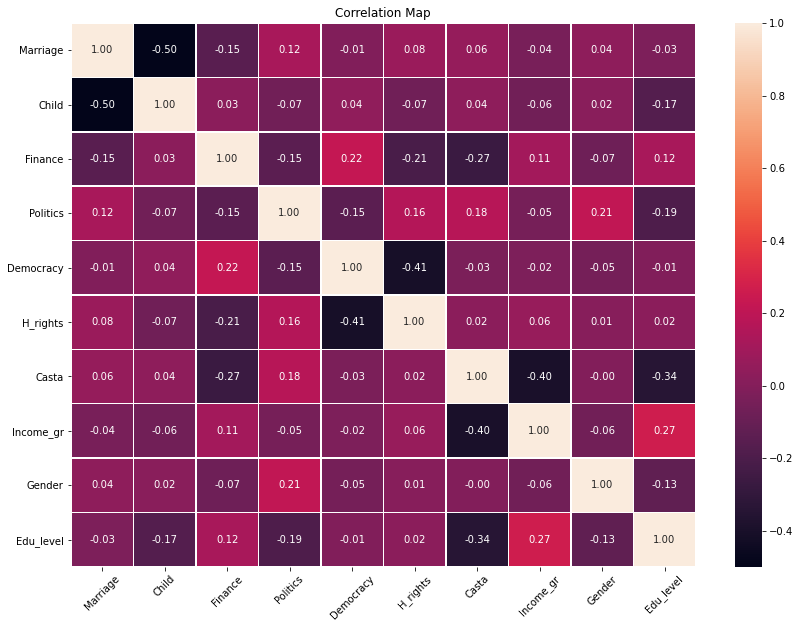

In [16]:
f,ax=plt.subplots(figsize = (14,10))
sns.heatmap(data_aze.corr(),annot= True,linewidths=0.5,fmt = ".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

The purpose of group correlation to identify collinarity between variables which are chosen for forecasting an output variable. If a correlation between variables are significantly higher, for instance 80-90%, it will cause multicolleniarity problem. It means that some of variables explain the same problem with close observations. For instance, if we have the data for employees' wages and females' wages, it will cause the multicolleniarity problem. Therefore aa data scientist will have to drop one of these variables, most often females' wages data. In our case, as we observe the correlation coefficients are noticably lower and we can easily conclude that these variables have not got the multicolleniarity problem

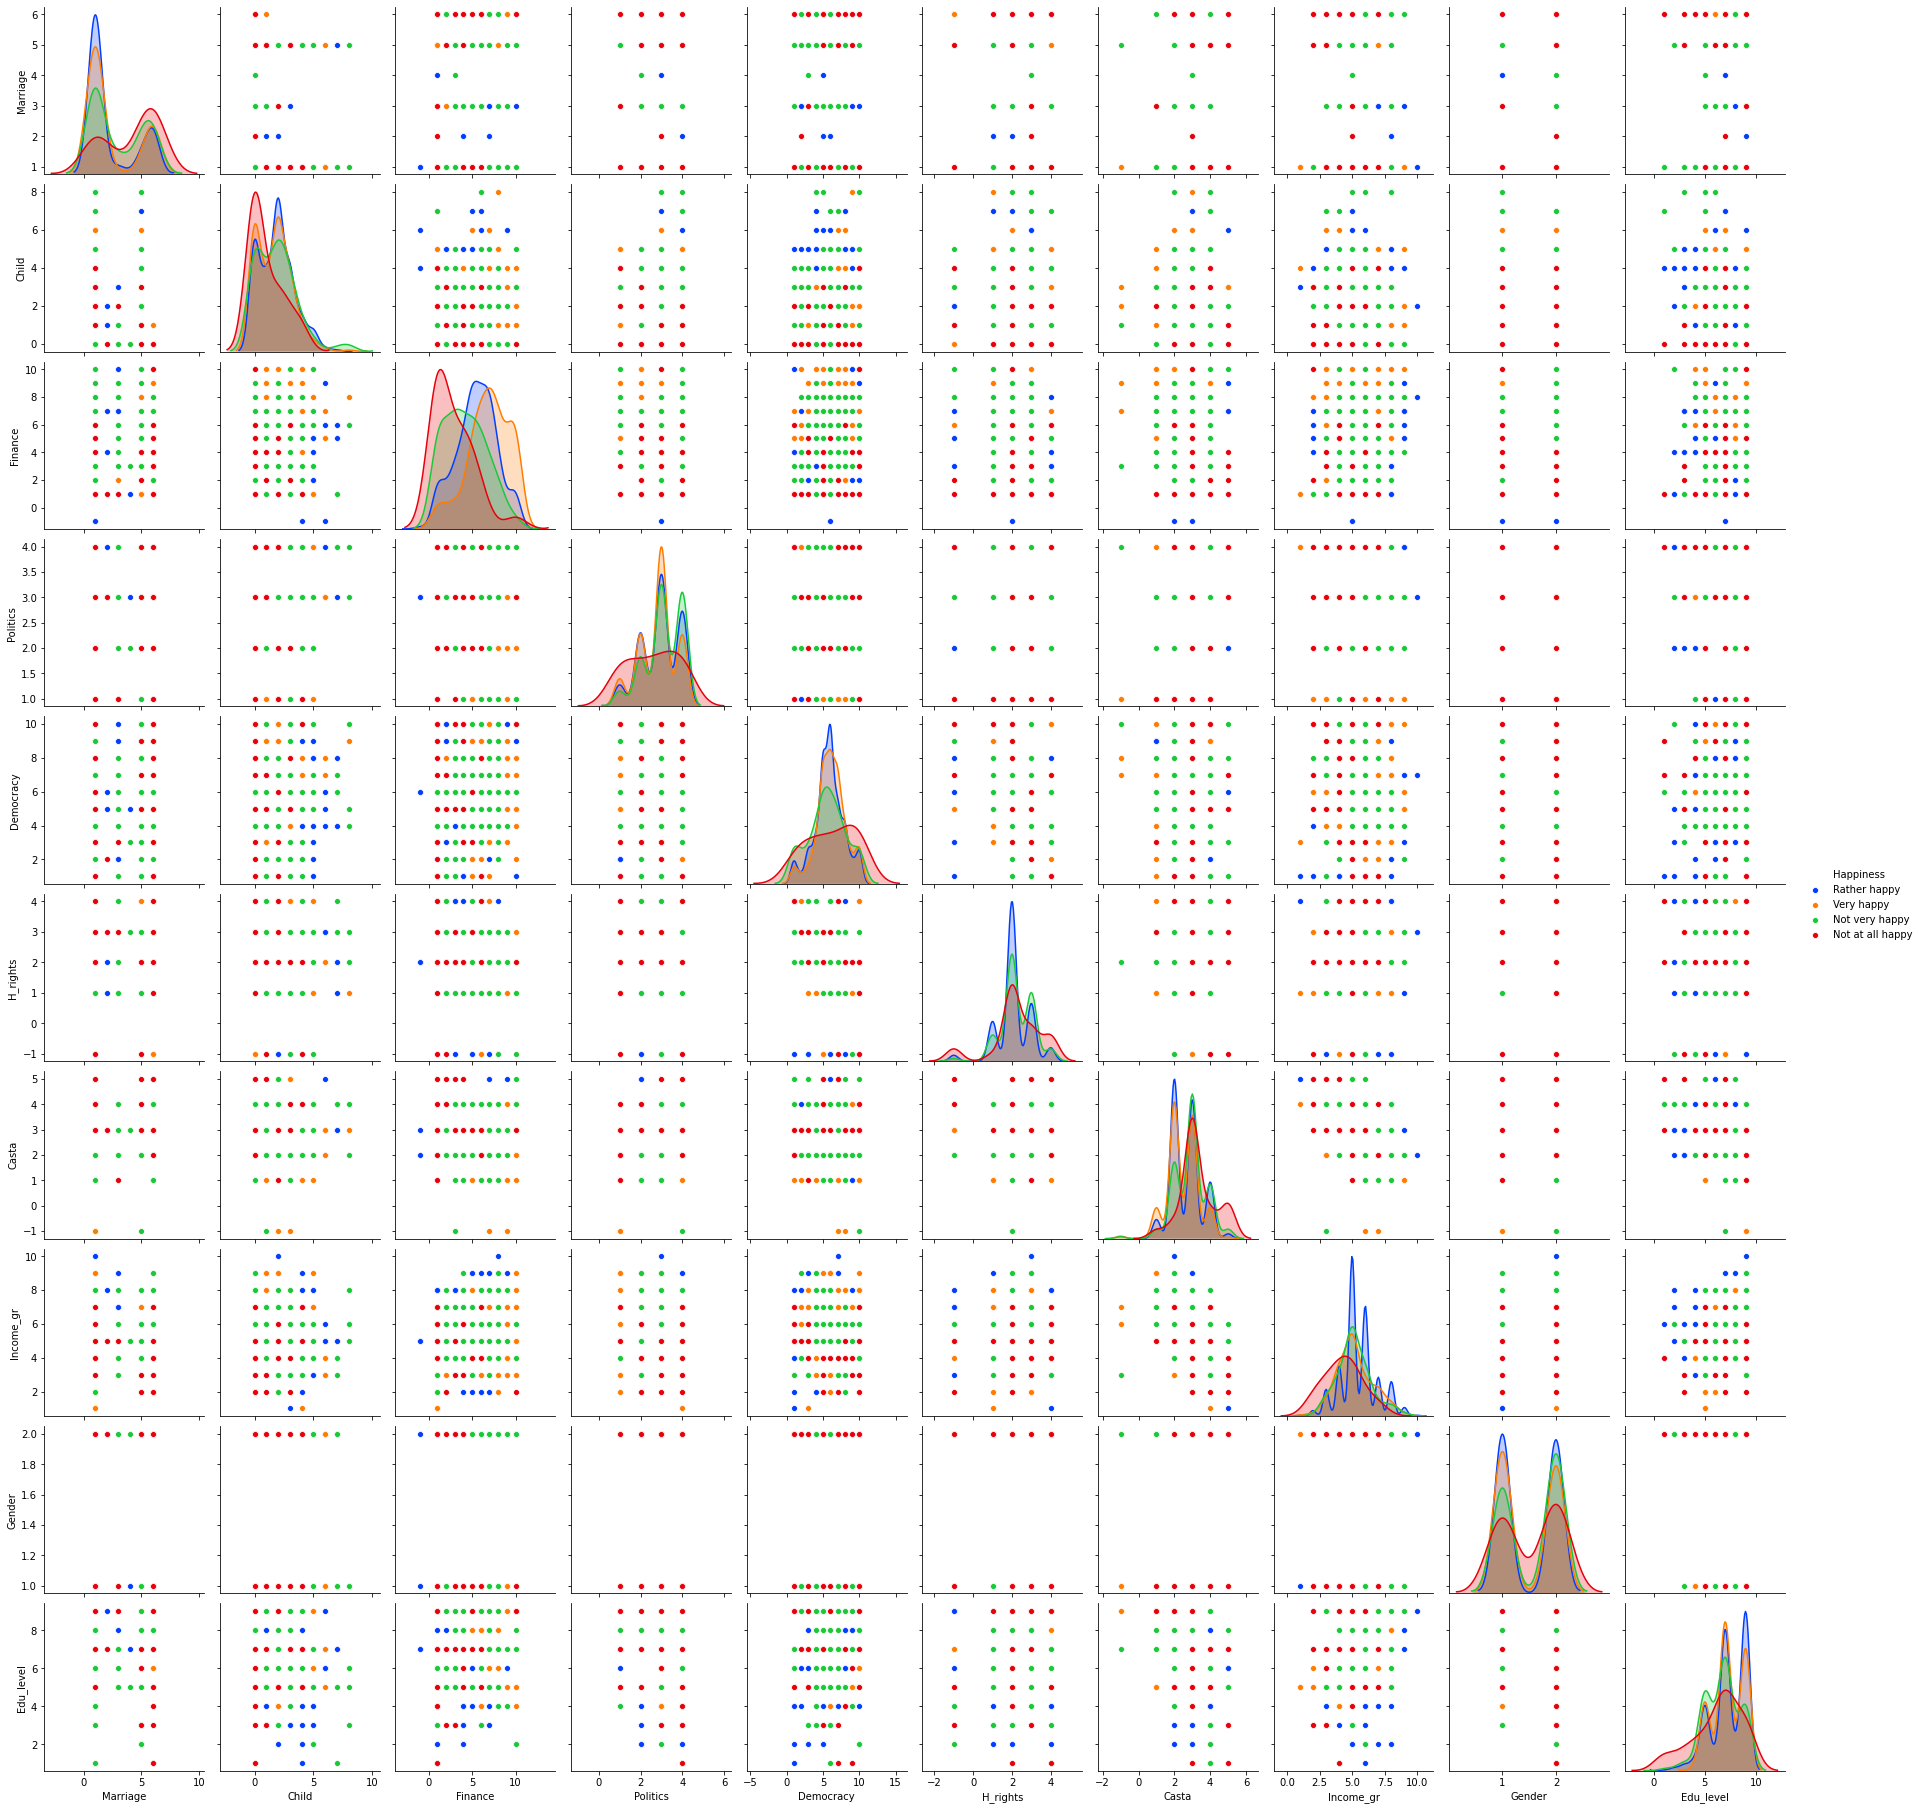

In [17]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(data_aze, hue = "Happiness", palette='bright')

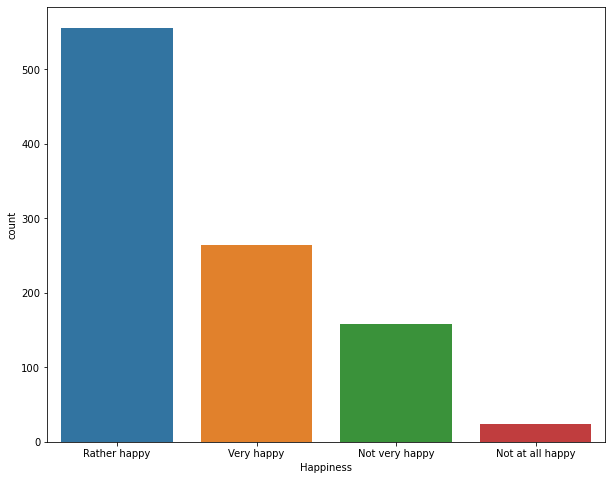

In [18]:
f,ax=plt.subplots(figsize = (10,8))
sns.countplot(x='Happiness',data=data_aze)

In [19]:
data_aze.iloc[np.random.choice(np.arange(len(data_aze)), size=10)]

,Marriage,Child,Finance,Politics,Democracy,H_rights,Casta,Income_gr,Gender,Edu_level,Happiness
5406,3,2,1,4,1,4,3,6,2,6.0,Not very happy
4972,1,2,6,2,5,2,1,6,1,9.0,Not very happy
5766,1,2,3,3,5,2,3,5,1,9.0,Not very happy
4841,1,2,9,3,6,2,2,5,2,7.0,Very happy
5565,6,0,8,3,7,3,2,5,1,5.0,Rather happy
5376,6,0,5,3,9,2,3,5,2,7.0,Rather happy
4969,1,0,7,3,5,3,1,6,1,9.0,Rather happy
5702,1,4,7,3,6,2,2,6,1,7.0,Rather happy
4887,1,2,3,2,4,2,2,5,1,9.0,Rather happy
4871,1,1,9,3,7,2,3,8,1,9.0,Very happy


In [20]:
# data_aze.Happiness.replace(["Very happy", "Rather happy", "Not very happy", "Not at all happy"],
                           #[4, 3, 2, 1],  inplace=True)

In [21]:
data_aze.head()

,Marriage,Child,Finance,Politics,Democracy,H_rights,Casta,Income_gr,Gender,Edu_level,Happiness
4807,1,3,5,1,2,3,2,6,1,7.0,Rather happy
4808,6,0,5,2,3,3,2,6,1,9.0,Rather happy
4809,1,3,7,4,3,3,2,6,2,7.0,Rather happy
4810,1,3,5,4,3,2,3,6,2,7.0,Rather happy
4811,6,0,7,4,4,3,2,6,2,7.0,Very happy


In [22]:
for col in data_aze.columns:
    print(col, ": ",len(data_aze[col].unique()), "labels")

Marriage :  6 labels
Child :  9 labels
Finance :  11 labels
Politics :  4 labels
Democracy :  10 labels
H_rights :  5 labels
Casta :  6 labels
Income_gr :  10 labels
Gender :  2 labels
Edu_level :  9 labels
Happiness :  4 labels


In [31]:
X = data_aze.iloc[:,0:10]
y = data_aze.iloc[:,10]

In [32]:
X.head()

,Marriage,Child,Finance,Politics,Democracy,H_rights,Casta,Income_gr,Gender,Edu_level
4807,1,3,5,1,2,3,2,6,1,7.0
4808,6,0,5,2,3,3,2,6,1,9.0
4809,1,3,7,4,3,3,2,6,2,7.0
4810,1,3,5,4,3,2,3,6,2,7.0
4811,6,0,7,4,4,3,2,6,2,7.0


In [33]:
y.head()

4807    Rather happy
4808    Rather happy
4809    Rather happy
4810    Rather happy
4811      Very happy
Name: Happiness, dtype: object

In [34]:
X = pd.get_dummies(X, drop_first=True, columns=["Marriage", "Politics", "H_rights", "Casta", "Gender", "Edu_level"])

In [35]:
X.shape

(1002, 30)

In [40]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X['Child'] = scalar.fit_transform(X[['Child']])
X['Finance'] = scalar.fit_transform(X[['Finance']])
X['Democracy'] = scalar.fit_transform(X[['Democracy']])
X['Income_gr'] = scalar.fit_transform(X[['Income_gr']])

In [41]:
X.head()

,Child,Finance,Democracy,Income_gr,Marriage_2,Marriage_3,Marriage_4,Marriage_5,Marriage_6,Politics_2,...,Casta_5,Gender_2,Edu_level_2.0,Edu_level_3.0,Edu_level_4.0,Edu_level_5.0,Edu_level_6.0,Edu_level_7.0,Edu_level_8.0,Edu_level_9.0
4807,0.804459,-0.232039,-1.812484,0.484392,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4808,-1.184196,-0.232039,-1.348599,0.484392,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4809,0.804459,0.552121,-1.348599,0.484392,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4810,0.804459,-0.232039,-1.348599,0.484392,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4811,-1.184196,0.552121,-0.884715,0.484392,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [42]:
X = X.values

In [43]:
X

array([[ 0.80445945, -0.23203948, -1.81248427, ...,  1.        ,
         0.        ,  0.        ],
       [-1.18419607, -0.23203948, -1.3485994 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.80445945,  0.55212093, -1.3485994 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.14157428,  0.94420114,  0.04305518, ...,  0.        ,
         0.        ,  0.        ],
       [-0.52131089,  0.94420114,  0.50694004, ...,  1.        ,
         0.        ,  0.        ],
       [-0.52131089, -1.0161999 , -1.81248427, ...,  1.        ,
         0.        ,  0.        ]])

In [44]:
y

4807      Rather happy
4808      Rather happy
4809      Rather happy
4810      Rather happy
4811        Very happy
             ...      
5804      Rather happy
5805      Rather happy
5806      Rather happy
5807      Rather happy
5808    Not very happy
Name: Happiness, Length: 1002, dtype: object

In [45]:
y = y.values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
# Import our model and performance assessement classes from sklearn

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Logistic Regression

In [48]:
# Fit (train) the Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, y_train)
logreg_prediction = logreg_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(logreg_prediction, y_test))
print(classification_report(logreg_prediction, y_test))

Accuracy 55.15%
[[  2   1   2   1]
 [  0   5  13   3]
 [  3  31 133  57]
 [  1   3  20  26]]
                  precision    recall  f1-score   support

Not at all happy       0.33      0.33      0.33         6
  Not very happy       0.12      0.24      0.16        21
    Rather happy       0.79      0.59      0.68       224
      Very happy       0.30      0.52      0.38        50

        accuracy                           0.55       301
       macro avg       0.39      0.42      0.39       301
    weighted avg       0.65      0.55      0.59       301

